In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import colorsys

No. 1

Resolusi intensitas adalah jumlah grayscale level yang dapat direalisasikan oleh setiap piksel. Biasanya satu piksel dalam gambar skala abu-abu akan memiliki 256 tingkat intensitas yang berbeda.
   contoh notasi operator :
   ![image-2.png](attachment:image-2.png)
   
   Resolusi spasial adalah ukuran objek terkecil yang masih dapat disajikan dibedakan, dan dikenali pada citra. Semakin kecil ukuran objek yang dapat direkam, semakin baik resolusi spasialnya. Begitupun sebaliknya, semakin besar ukuran objek yang dapat direkam, semakin buruk resolusi spasialnya.
   contoh notasi operator :
   ![image-3.png](attachment:image-3.png)

In [ ]:
rgb_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb_yiq = np.vectorize(colorsys.rgb_to_yiq)
yiq_rgb = np.vectorize(colorsys.yiq_to_rgb)

No. 2


In [ ]:
def GeoFun( outcoord ):
  a = 20*np.cos( outcoord[0]/20. )+outcoord[0]
  b = 20*np.cos( outcoord[1]/20. )+outcoord[1]
  return a,b

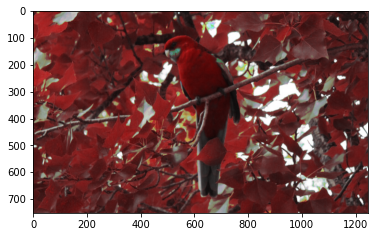

In [ ]:
a2 = imageio.imread('bird.jpeg')/255

a2_r= a2[:, :, 0]
a2_s= a2[:, :, 2]

m= ((s/(1.1-r))>0.5)*s/(1.1-r)

t_h, t_s, t_v= rgb_hsv(a2[:, :, 0], a2[:, :, 1], a2[:, :, 2])

b= np.dstack(((t_h*m), t_s, t_v))

n_r, n_g, n_b= hsv_rgb(b[:, :, 0], b[:, :, 1], b[:, :, 2])

n= np.dstack((n_r, n_g, n_b))

plt.imshow(n)


No. 3


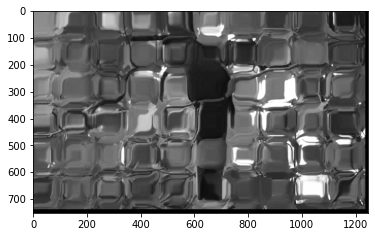

In [ ]:
a3= imageio.imread('bird.jpeg')/255

b3= imageio.imread('bird.jpeg', as_gray=True).astype(np.uint8)

c3= nd.geometric_transform(b3, GeoFun)

temp= b3 & 0x80
d3= 1-(temp[4]>0)*temp[4]>0
g3= c3*d3

plt.imshow(g3, cmap="gray")